In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os
import seaborn as sns

In [3]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

In [4]:
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


## Definition

A choropleth map divides a geographical area with different shadings over one variable. The variable uses color progression from light to dark to highlight a change over a geographical area. This map is used to show a variation or different patterns throughout the area.

This can be used to model a certain feature in relation to oil production. If there is more of a certain feature that has a darker shade than the area that has less of the feature which can allow comparison in oil production. 

For example, if there is more oil production is lightly shaded areas based on a feature, we can conclude that the less of that feature can allow for more oil production rather than more of that feature in an area.

In [6]:
import geopandas as gpd   

In [9]:
map_df = gpd.read_file("../NDGISHubData/NDHUB.PLSSTOWNSHIPS_polygon.shp") #Shape files based on townships

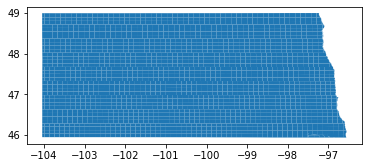

In [10]:
map_df.plot()

In [11]:
gdf = gpd.GeoDataFrame(DatabaseDF, geometry=gpd.points_from_xy(DatabaseDF.Longitude, DatabaseDF.Latitude))
# Take the data base and make a geopandas point with latitude and longitude

In [12]:
merged = gpd.sjoin(map_df, gdf, how="inner", op='intersects') # Merge new map of ND and the current database

/opt/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [13]:
merged

,OBJECTID,TOWNSHIP,TDIR,RANGE,RDIR,TWPRNG,TWPTEXT,RNGTEXT,TWPRNGTEXT,AREA_MI2,...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
5,1135,148,N,94,W,148094,T148N,R94W,T148N R94W,35.290720,...,NaN,589.66871,92.97,Sleeves,18.0,NaN,NaN,NaN,NaN,2010.0
5,1135,148,N,94,W,148094,T148N,R94W,T148N R94W,35.290720,...,NaN,660.00000,51.41,Sleeves,10.0,NaN,NaN,NaN,NaN,2008.0
5,1135,148,N,94,W,148094,T148N,R94W,T148N R94W,35.290720,...,NaN,660.00000,71.33,P & P,NaN,6.0,NaN,NaN,NaN,2008.0
5,1135,148,N,94,W,148094,T148N,R94W,T148N R94W,35.290720,...,NaN,660.00000,37.93,P & P,NaN,12.0,NaN,NaN,NaN,2009.0
5,1135,148,N,94,W,148094,T148N,R94W,T148N R94W,35.290720,...,NaN,660.00000,76.78,Sleeves,12.0,NaN,NaN,NaN,NaN,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,854,143,N,103,W,143103,T143N,R103W,T143N R103W,35.417006,...,NaN,660.00000,88.16,Sleeves,40.0,NaN,NaN,NaN,NaN,2012.0
2061,854,143,N,103,W,143103,T143N,R103W,T143N R103W,35.417006,...,NaN,445.57061,105.46,Sleeves,30.0,NaN,NaN,NaN,NaN,2011.0
2061,854,143,N,103,W,143103,T143N,R103W,T143N R103W,35.417006,...,NaN,660.00000,94.74,Sleeves,16.0,NaN,NaN,NaN,NaN,2009.0
2061,854,143,N,103,W,143103,T143N,R103W,T143N R103W,35.417006,...,SLICKWATER (HC),660.00000,64.89,P & P,NaN,40.0,NaN,NaN,NaN,2014.0


I went through and used spatial join to get the information from the township on location and the current Dataframe."How" is using "inner": use intersection of index values from both geodataframes; retain only the left_df geometry column. "Op" is using "intersects": The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.

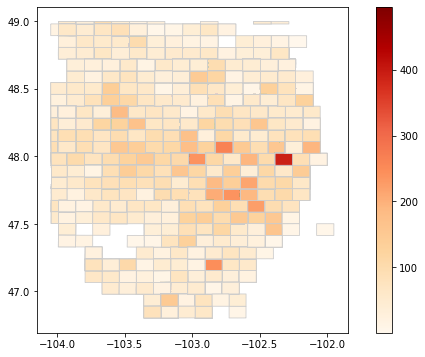

In [22]:
def coroMap(merged, variable):
    vmin = merged['12 month Cum Prod'].min()
    vmax = merged['12 month Cum Prod'].max()

    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    sm._A = []

    fig, ax = plt.subplots(1, figsize=(10, 6))

    cbar = fig.colorbar(sm)

    merged.plot(column=variable, cmap = 'OrRd', linewidth = .8, ax = ax, edgecolor = '0.8')


coroMap(merged, '12 month Cum Prod')

We are able to see where is the most 12 month cumulative production through North Dakota. This map uses Townships to be able to color code allow the spaces to exist. I wonder if we can use the map to find a correlation between, longitude, latitude, township, and the 12 month cumulative production.


We need to look at the corrlations of how longitude and latitude can impact the different features. Also, can we implement correlation onto the map

Seems like to make the map, these frac ports may not be the best way to visualize the relation between location. This may also make me think that correlation is not factored into the choropleth map as well. This requires more testing

## Messing with Different Features 

Although it is not obviously clear on how to connect correlation and error, I have decided to work with a couple of the features to understand and possibly compare side by side how the graphs look.

In [23]:
merged['Sleeves'].fillna(0)

5       18.0
5       10.0
5        0.0
5        0.0
5       12.0
        ... 
2061    40.0
2061    30.0
2061    16.0
2061     0.0
2061    22.0
Name: Sleeves, Length: 10856, dtype: float64

/opt/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


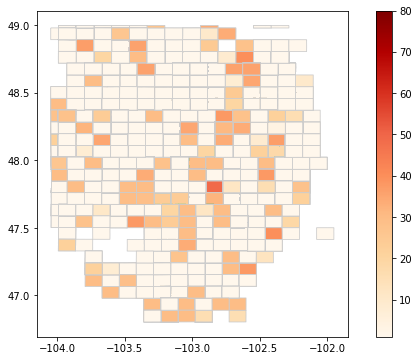

In [29]:
def coroMap(merged, variable):
    vmin = merged['Sleeves'].min()
    vmax = merged['Sleeves'].max()

    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    sm._A = []

    fig, ax = plt.subplots(1, figsize=(10, 6))

    cbar = fig.colorbar(sm)

    merged.plot(column=variable, cmap = 'OrRd', linewidth = .8, ax = ax, edgecolor = '0.8')


coroMap(merged, 'Sleeves')

Looking at the data, could we possibly take the average of some of the components to understand the relationship between the features? Requires more testing.

### Would this work with the Port features that failed to showcase in the beginning?

/opt/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


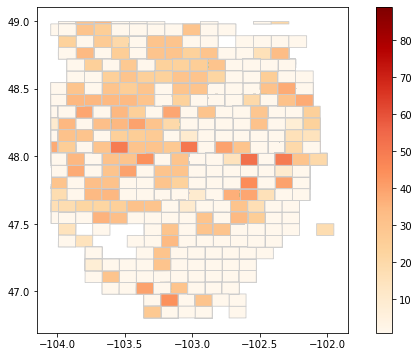

In [30]:
def coroMap(merged, variable):
    vmin = merged['P&P'].min()
    vmax = merged['P&P'].max()

    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    sm._A = []

    fig, ax = plt.subplots(1, figsize=(10, 6))

    cbar = fig.colorbar(sm)

    merged.plot(column=variable, cmap = 'OrRd', linewidth = .8, ax = ax, edgecolor = '0.8')


coroMap(merged, 'P&P')

Convert all Formation to numerical values for comparison

In [42]:
labels = merged['Formation'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
merged.replace({'Formation': mapping},inplace=True)
# Transfer all the different types of formations into numerical values

In [43]:
mapping

{'MBH': 0,
 'TFH': 1,
 'TF2': 2,
 'TF3': 3,
 'TF4': 4,
 'TF1': 5,
 'MBH/TFH': 6,
 nan: 7,
 'UTFH': 8,
 'TFSH': 9,
 'MTFH': 10,
 'TF2.5': 11}

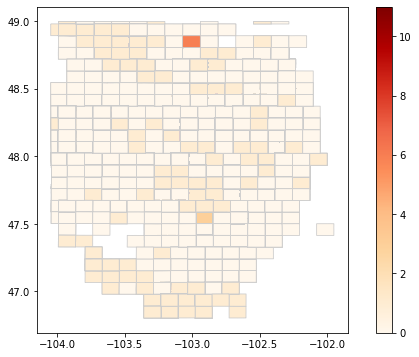

In [44]:
def coroMap(merged, variable):
    vmin = merged['Formation'].min()
    vmax = merged['Formation'].max()

    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    sm._A = []

    fig, ax = plt.subplots(1, figsize=(10, 6))

    cbar = fig.colorbar(sm)

    merged.plot(column=variable, cmap = 'OrRd', linewidth = .8, ax = ax, edgecolor = '0.8')


coroMap(merged, 'Formation')


'''Can explore with other variables like Total Proppant, Fluid, etc and how they affect production, as well as how they are affected by cost/time'''

Average may not be the best way, yet it does indicate some relationship between different variables

## Better ways to measure criteria?

After working on this model for some time, I am having trouble getting correlation visualized. I wonder if there is some code that can allow to see relationship between each point to be displayed on the map?

Using Average is beneficial yet can be difficult to tell the difference in terms of shading on the map

In [45]:
X = merged['Longitude']
Y = merged['Formation']

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
yfit = [a + b * xi for xi in X]

best fit line:
y = -1.17 + -0.02x


In [46]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print(MAE(X, yfit))
print(MSE(X, yfit))

'''Narrrow it down to one error measure that best represents this model'''

103.39203674541743
10690.123033036667


In [47]:
X = merged['Longitude']
Y = merged['12 month Cum Prod']

a, b = best_fit(X, Y)
yfit = [a + b * xi for xi in X]

best fit line:
y = 2694.79 + 25.21x


In [48]:
print(MAE(X, yfit))
print(MSE(X, yfit))

201.39836964887962
40680.59609799189


## Notes

This map cannot display two variables; However, this could be used a visualization with other models. Moving throughout the sprints will be the best way to understand what else this model can do